## Name: Erfan Shahabi
## Student ID: 810103166

## بخش اول

<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">

در این قسمت ابتدا محیط colab را به google drive متصل کردم تا دیتا ست را لود کنم.
بعد از لود کردن دیتا ست نمونه ای از دیتا ست را برای آشنایی چاپ کردم.
در مرحله بعد، همانطور که سوال خواسته بود، ستون UnitPrice را به فرمت عددی تبدیل کردم و فرمت ستون های موجود را هم چاپ کردم.
برای پیش پردازش داده ها، در مرحله بعد ابتدا ستون Country و Unnamed: 0 که بلا استفاده بودند را از دیتافریم حذف کردم.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import pandas as pd
import numpy as np
data_path = '/content/drive/MyDrive/DM_CA3/online_retail.csv'
df = pd.read_csv(data_path)
df

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
1,27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
2,28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
3,29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
4,30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France
...,...,...,...,...,...,...,...,...,...
46426,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
46427,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
46428,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
46429,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [27]:
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

In [28]:
df.dtypes

,0
Unnamed: 0,int64
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [29]:
df = df.drop(columns=['Country'])
df = df.drop(columns=['Unnamed: 0'])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0
...,...,...,...,...,...,...,...
46426,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0
46427,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0
46428,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0
46429,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0


<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">
برای حذف کردن داده های تکراری، در مرحله بعد، داده هایی که در ستون های InvoiceNo، Description، StockCode و Quantity دارای مقادیر یکسان بودند را حذف کردم. تعداد ردیف داده در دیتا فریم خام،‌ ابتدا ۴۶۴۳۱ داده بود و بعد از حذف مقادیر تکراری، تعداد ردیف داده ها به ۴۶۳۲۵ رسید که یعنی ۱۰۶ داده به عنوان داده تکراری شناسایی و حذف شدند.
سپس در مرحله بعد، تعداد تراکنش ها برای هر مشتری با CustomerID یکسان را محاسبه کردم که مشتری با شماره ۵۸۹۸ بیشترین تعداد تراکنش را در این فروشگاه داشته است.
در مرحله بعدی پیش پردازش متوجه شدم که کالاهایی که با پست ارسال شدند، دارای StockCode و Description مشابه بودند و برای مرحله پیدا کردن الگوها، با اینکه ممکن است این کالاها متفاوت باشند، دچار اشتباه می شویم. به همین دلیل داده های کالاهایی که با پست ارسال شده بودند را حذف کردم که تعداد ردیف این داده ها ۱۱۱۲ عدد بود.


In [30]:

df = df.drop_duplicates(subset=['InvoiceNo', 'Description', 'StockCode', 'Quantity'])
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0
...,...,...,...,...,...,...,...
46426,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0
46427,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0
46428,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0
46429,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0


In [32]:
transaction_counts = df['CustomerID'].value_counts().sort_values(ascending=False)


transaction_counts

,count
CustomerID,
14911.0,5898
14646.0,2085
14156.0,1415
12415.0,778
12681.0,646
...,...
12814.0,2
12666.0,2
17443.0,1


In [14]:

df['Description'] = df['Description'].astype(str).str.strip().str.lower()

df_post = df[df['StockCode'] == 'POST']

df_post

<ipython-input-14-5bdb2e5d6f6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description'] = df['Description'].astype(str).str.strip().str.lower()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
19,536370,POST,postage,3,2010-12-01 08:45:00,18.0,12583.0
35,536403,POST,postage,1,2010-12-01 11:27:00,15.0,12791.0
50,536527,POST,postage,1,2010-12-01 13:04:00,18.0,12662.0
173,536840,POST,postage,1,2010-12-02 18:27:00,18.0,12738.0
180,536852,POST,postage,1,2010-12-03 09:51:00,18.0,12686.0
...,...,...,...,...,...,...,...
46333,581493,POST,postage,1,2011-12-09 10:10:00,15.0,12423.0
46351,581494,POST,postage,2,2011-12-09 10:13:00,18.0,12518.0
46364,581570,POST,postage,1,2011-12-09 11:59:00,18.0,12662.0
46377,581574,POST,postage,2,2011-12-09 12:09:00,18.0,12526.0


In [34]:
df = df[df['StockCode'] != 'POST']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0
...,...,...,...,...,...,...,...
46426,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0
46427,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0
46428,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0
46429,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0


## بخش دوم

<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">


برای قسمت دوم سوال، ابتدا کتابخانه mlxtend را نصب کردم تا بتوانم از ابزارهایی مانند apriori و fpgrowth و ... استفاده کنم.
در مرحله بعد، سبد خرید را از داده های اصلی ساختم. ابتدا داده ها را بر اساس InvoiceNo گروه بندی کردم و برای هر فاکتور، تمام StockCodeها رو در قالب یک لیست جمع کردم. خروجی این مرحله دیتافریمی است که هر ردیفش یک transaction است. سپس لیست ها را به one hot encoding تبدیل کردم بدین صورت که هر لیست از آیتم ها در ستون StockCode رو به یک سطر از ۰ و ۱ ها تبدیل می کند. اگر سلول ۱ باشد یعنی آیتم مورد نظر در آن تراکنش هست و اگر ۰ باشد به معنی این است که آیتم در تراکنش نیست.


In [16]:
!pip install mlxtend

In [35]:
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

basket = df.groupby('InvoiceNo')['StockCode'].apply(list).reset_index()
te = TransactionEncoder()
te_ary = te.fit(basket['StockCode']).transform(basket["StockCode"])
df_trans = pd.DataFrame(te_ary, columns=te.columns_)
df_trans.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90202D,90204,90205A,90205C,90208,90209A,90209C,C2,D,M
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">

سپس در مرحله بعد سعی کردم دو الگوریتم Apriori و FP-Growth را روی داده ها اجرا کنم. به این صورت که ابتدا الگوریتم Apriori را روی ماتریس تراکنش ها اعمال کردم و طبق گفته سوال minimum support را برابر با 0.06 قرار دادم که به این معناست که آیتم هایی frequent هستند که حداقل در 6% از کل تراکنش ها ظاهر شده باشند. Use_colnames را هم برابر با True قرار دادم که باعث می شود تا به جای اندیس ها، نام ستون ها (یعنی کد محصول) در خروجی نمایش داده شود.
در مرحله بعد نیز مشابه با مرحله قبل منتها این بار الگوریتم FP-Growth را روی داده ها اجرا کردم. مزیت این الگوریتم نسبت به الگوریتم Apriori سریع تر و بهینه تر بودن آن است. چرا که بدون تولید مرحله به مرحله کاندیداها کار می کند.
در نهایت top frequent itemها را چاپ کردم.


In [39]:
frequent_apriori = apriori(df_trans, min_support=0.06, use_colnames=True)
frequent_fpgrowth = fpgrowth(df_trans, min_support= 0.06, use_colnames=True)
print("Apriori Results:")
print(frequent_apriori.sort_values('support', ascending=False).head())

print("\nFP-Growth Results:")
print(frequent_fpgrowth.sort_values('support', ascending=False).head())

Apriori Results:
     support itemsets
11  0.144079  (22423)
9   0.134673  (22326)
13  0.094912  (22554)
14  0.089782  (22556)
15  0.085934  (22629)

FP-Growth Results:
     support itemsets
13  0.144079  (22423)
0   0.134673  (22326)
3   0.094912  (22554)
4   0.089782  (22556)
1   0.085934  (22629)


<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">
که همانطور که در نتایج مشخص است نتایج هر دو الگوریتم یکسان است و نشان دهنده این است که هر دو الگوریتم صحیح اجرا شده اند. بیشترین تکرار برای آیتم 22423 بوده است که نشان می دهد این آیتم در 14.4% تراکنش ها تکرار شده است.
در مرحله بعد نام این محصولات پر تکرار را چاپ کردم که به شرح زیر است:
نتایج نشان دهنده این است که پر تکرار ترین محصول در تراکنش ها، پایه کیک ۳ طبقه بوده است که احتمالا در دسته بندی ظروف آشپرخانه دسته بندی می شود و در رتبه دوم هم ست ۴ عددی ظرف گرد برای تنقلات قرار دارد که آن هم دسته بندی مشابه با آیتم قبلی دارد. آیتم پر تکرار پنجم هم مربوط به دسته ظروف است و دو آیتم سوم و چهارم هم مربوط به لوازم بهداشتی می باشند. میتوان تصور کرد که در بازه ای که داده ها ثبت شده اند، فروشگاه طرح فروش ویژه و یا تخفیف روی این دو دسته بندی داشته است.

In [38]:
popular_codes = ['22423', '22326', '22554', '22556', '22629']
for code in popular_codes:
    name = df[df['StockCode'] == code]['Description'].unique()
    print(f"{code}: {name}")

22423: ['REGENCY CAKESTAND 3 TIER']
22326: ['ROUND SNACK BOXES SET OF4 WOODLAND ']
22554: ['PLASTERS IN TIN WOODLAND ANIMALS']
22556: ['PLASTERS IN TIN CIRCUS PARADE ']
22629: ['SPACEBOY LUNCH BOX ']



<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">






در مرحله بعدی این سوال، زمان اجرای الگوریتم و تعداد الگوهای پیدا شده توسط این دو الگوریتم را محاسبه کردم که نتایج به شرح زیر می باشد:
طبق نتایج به دست آمده،‌ هر دو الگوریتم توانستند ۲۴ الگوی پر تکرار را استخراج کنند که نشان می دهد هر دو الگوریتم نتایج یکسانی داشته و به درستی اجرا شده اند.
اما مسئله ای که قابل تامل است زمان اجرای این دو الگوریتم است. ما انتظار داشتیم که الگوریتم FP-Growth سریع تر اجرا شود چرا که این الگوریتم بدون تولید مرحله به مرحله کاندیداها کار میکند. اما احتمالا دلیل نتیجه به دست آمده و سریع تر بودن الگوریتم Apriori، تعداد کم داده هاست.


In [20]:
import time

start = time.time()
apriori(df_trans, min_support=0.06, use_colnames=True)
end = time.time()
print("Apriori time:", end - start)

start = time.time()
fpgrowth(df_trans, min_support=0.06, use_colnames=True)
end = time.time()
print("FP-Growth time:", end - start)

Apriori time: 0.024270057678222656
FP-Growth time: 0.26194119453430176


In [40]:

print("Apriori patterns found:", len(frequent_apriori))
print("FP-Growth patterns found:", len(frequent_fpgrowth))

Apriori patterns found: 24
FP-Growth patterns found: 24


## بخش سوم


<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">

در مرحله بعد طبق خواسته سوال سعی کردم کدی را بنویسم که association ruleها رو از frequent itemsetها استخراج کند. برای این کار از متد association_rules از کتابخانه mlxtend استفاده کردم. با توجه به این که ابتدا confidence را برابر با 0.1 قرار دادم،‌ تعداد قوانین استخراج شده برابر با ۲ قانون بود. این مقدار confidence به این معناست که صرفا قوانینی نگه داشته می شوند که حداقل در 10% موارد، وقتی سمت چپ قانون رخ داده، سمت راست قانون هم رخ دهد. طبیعی است که با افزایش مقدار confidence،‌ تعداد قوانین استخراج شده کاهش پیدا میکند.

برای مثال با مقادیر confidence مختلف، تعداد قوانین استخراج شده به شرح زیر است:



که همانطور که مشخص است تعداد قوانین با افزایش confidence کاهش پیدا میکند.
طبق گفته سوال من مقدار confidence را برابر با 0.7 قرار دادم که تنها یک قانون استخراج شد که احتمالا دلیل تعداد کم قوانین استخراج شده،‌ تعداد محدود داده هاست.
قانونی که با این مقدار confidence به دست آمده قانون زیر است:
(22328) => (22326)
آیتم ۲۲۳۲۶، ست ۴ تایی ظرف خوراکی با طرح جنگل است.
آیتم ۲۲۳۲۸، ست ۴ تایی ظرف خوراکی با طرح میوه ای است.
و مقادیر محاسبه شده برای این قانون به شرح زیر است:
Support: 6.1%
که به این معناست که این قانون در ۶.۱ درصد از کل تراکنش ها صدق میکند
Confidence: 72.95%
 که به این معنی است که دز ۷۲.۹۵ درصد از مواقعی که آیتم ۲۲۳۲۸ خریداری شده، ۲۲۳۲۶ هم خریداری شده است.
Lift: 5.42
که به این معنی است که احتمال خرید ۲۲۳۲۶ وقتی ۲۲۳۲۸ خریده شده، بیش از ۵ برابر است.
Kulczynski: 0.59
که به این منی است میانگین confidence دو طرفه برای این دو آیتم برابر با ۰.۵۹ است. این عدد به این معناست که نمی توان انتظار داشت برعکس این قانون هم اتفاق بیفتد،‌ یعنی حدودا در ۴۱ درصد مواقع نمیتوان انتظار داشت که مشتر با خرید آیتم ۲۲۳۲۶، آیتم ۲۲۳۲۸ را هم خریداری کند.
اما در حالت کلی،‌ از آنجایی که confidence برای این قانون درصد قابل توجهی است، به طور کلی میتوان انتظار داشت که این قانون معتبر بوده و برقرار باشد.


In [41]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_apriori, metric="confidence", min_threshold=0.1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(22328),(22326),0.083796,0.134673,0.061137,0.729592,5.417509,1.0,0.049852,3.200077,0.889991,0.388587,0.687508,0.59178
1,(22326),(22328),0.134673,0.083796,0.061137,0.453968,5.417509,1.0,0.049852,1.677931,0.942318,0.388587,0.404028,0.59178


In [24]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_apriori, metric="confidence", min_threshold=0.7)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(22328),(22326),0.083796,0.134673,0.061137,0.729592,5.417509,1.0,0.049852,3.200077,0.889991,0.388587,0.687508,0.59178


In [25]:
for threshold in [0.3, 0.5, 0.7, 0.9]:
    rules_temp = association_rules(frequent_fpgrowth, metric="confidence", min_threshold=threshold)
    print(f"Min Confidence: {threshold} → {len(rules_temp)} rules")

Min Confidence: 0.3 → 2 rules
Min Confidence: 0.5 → 1 rules
Min Confidence: 0.7 → 1 rules
Min Confidence: 0.9 → 0 rules


In [42]:
rules_codes = [ '22326', '22328']
for code in rules_codes:
    name = df[df['StockCode'] == code]['Description'].unique()
    print(f"{code}: {name}")

22326: ['ROUND SNACK BOXES SET OF4 WOODLAND ']
22328: ['ROUND SNACK BOXES SET OF 4 FRUITS ']


## بخش چهارم

<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">

در این مرحله نیز برای تحلیل ارتباط بین میزان فروش و قیمت، ابتدا پروفروش ترین محصولات را انتخاب کردم و جدول تعداد فروش ۱۰ محصول اول با قیمت هایشان را چاپ کردم. همچنین در مرحله بعد نمودار مربوط به تعداد فروش و قیمت محصولات را در قالب یک scatter plot چاپ کردم.
در این نمودار، محور افقی نشان دهنده تعداد کل خرید از هر محصول است و محور عمودی،‌ نشان دهنده میانگین قیمت هر محصول می باشد.
الگوی اصلی نمودار نشان دهنده رابطه معکوس بسیار قوی بین قیمت و تعداد فروش کالا است. در این نمودار بیشترین نقاط فروش در ناحیه ای هستند که تعداد خرید بالاست ولی قیمت پایین است. یعنی محصولات ارزان زیاد خریداری شده اند)
محصولات با قیمت بالا مثلا بین ۱۰۰ تا بالای ۸۰۰ دلار، فقط در تعداد بسیار پایین فروخته شده‌اند. (معمولا زیر ۱۰ تا ۲۰ عدد)
نتیجه گیری نهایی: در کل میتوان به این نتیجه گرفت که در این فروشگاه، محصولاتی با قیمت پایین تر فروش بسیار بالاتری داشته اند. در این فروشگاه، رفتار مشتریان به وضوح تحت تاثیر قیمت قرار دارد و ارزان بودن کالا نقش کلیدی در افزایش فروش دارد. همچنین کالاهای گران قیمت تقریبا فروش بسیار پایینی داشته اند و بعضا ممکن است فقط یک بار خریداری شده باشند.


In [51]:
df_summary = df.groupby('Description').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean'
}).reset_index()


df_summary = df_summary.sort_values('Quantity', ascending=False)
df_summary.head(10)

,Description,Quantity,UnitPrice
1956,RABBIT NIGHT LIGHT,15478,1.923436
1522,MINI PAINT SET VINTAGE,12517,0.642727
1687,PACK OF 72 RETROSPOT CAKE CASES,11337,0.534000
2496,SPACEBOY LUNCH BOX,8373,1.893284
726,DOLLY GIRL LUNCH BOX,7161,1.884194
2144,ROUND SNACK BOXES SET OF4 WOODLAND,6829,2.895397
2048,RED TOADSTOOL LED NIGHT LIGHT,6774,1.631633
2853,WORLD WAR 2 GLIDERS ASSTD DESIGNS,5521,0.286923
1903,PLASTERS IN TIN WOODLAND ANIMALS,5178,1.635650
1900,PLASTERS IN TIN SPACEBOY,4954,1.629348


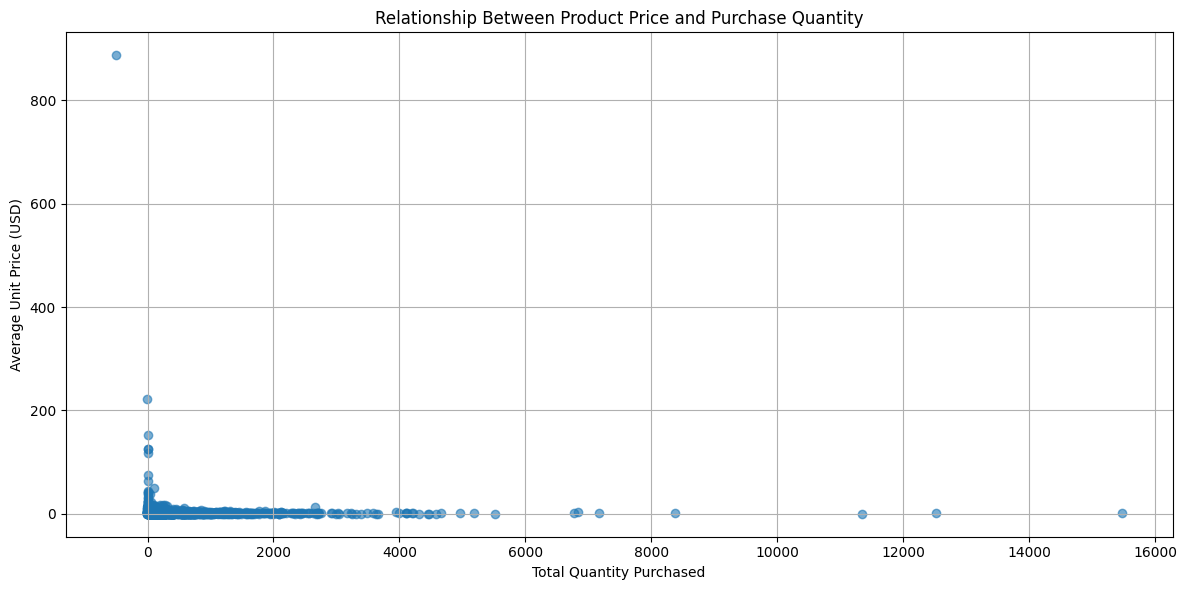

In [53]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.scatter(df_summary['Quantity'], df_summary['UnitPrice'], alpha=0.6)

plt.title('Relationship Between Product Price and Purchase Quantity')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Average Unit Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()